# Univariate Linear Regression

In [70]:
# import libraries
library(caret)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(modelr)
library(skimr)
library(AppliedPredictiveModeling)

Warning message:
“package ‘skimr’ was built under R version 3.4.4”
Attaching package: ‘skimr’

The following objects are masked from ‘package:dplyr’:

    contains, ends_with, everything, matches, num_range, one_of,
    starts_with



## Alligator data: predict weight from snout length

<img src="alligator.jpeg",width=400,height=200 >
[Image via Wikimedia Commons]

In [7]:
alligator = data.frame(
  ln_snout_length = c(3.87, 3.61, 4.33, 3.43, 3.81, 3.83, 3.46, 3.76,
    3.50, 3.58, 4.19, 3.78, 3.71, 3.73, 3.78),
  ln_weight = c(4.87, 3.93, 6.46, 3.33, 4.38, 4.70, 3.50, 4.50,
    3.58, 3.64, 5.90, 4.43, 4.38, 4.42, 4.25)
)

head(alligator, 5)

ln_snout_length,ln_weight
3.87,4.87
3.61,3.93
4.33,6.46
3.43,3.33
3.81,4.38


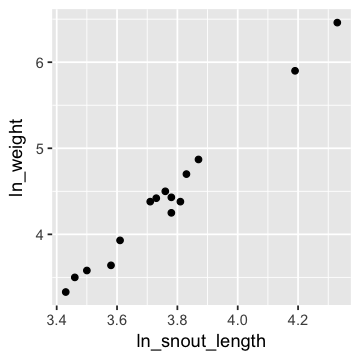

In [34]:
plot <- alligator %>% 
ggplot(aes(x =ln_snout_length, y = ln_weight)) + 
geom_point()

plot
options(repr.plot.width=3, repr.plot.height=3)

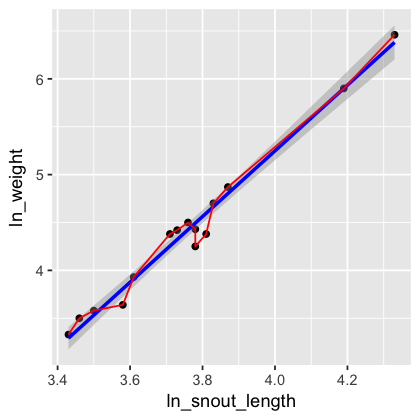

In [48]:
# ggplot can add a linear model using stat_smooth
plot + stat_smooth(method = "lm", col = "blue") + 
geom_line(colour = "red") 

options(repr.plot.width=3.5, repr.plot.height=3.5)

lm( ) is a built-in function that fits a linear model to the data we specify. 
* form: "response variable" ~ "explanatory variables"

In [27]:
fit = lm(ln_weight ~ ln_snout_length, data = alligator)

In [51]:
summary(fit)


Call:
lm(formula = ln_weight ~ ln_snout_length, data = alligator)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24348 -0.03186  0.03740  0.07727  0.12669 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -8.4761     0.5007  -16.93 3.08e-10 ***
ln_snout_length   3.4311     0.1330   25.80 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1229 on 13 degrees of freedom
Multiple R-squared:  0.9808,	Adjusted R-squared:  0.9794 
F-statistic: 665.8 on 1 and 13 DF,  p-value: 1.495e-12


ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 15, 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj

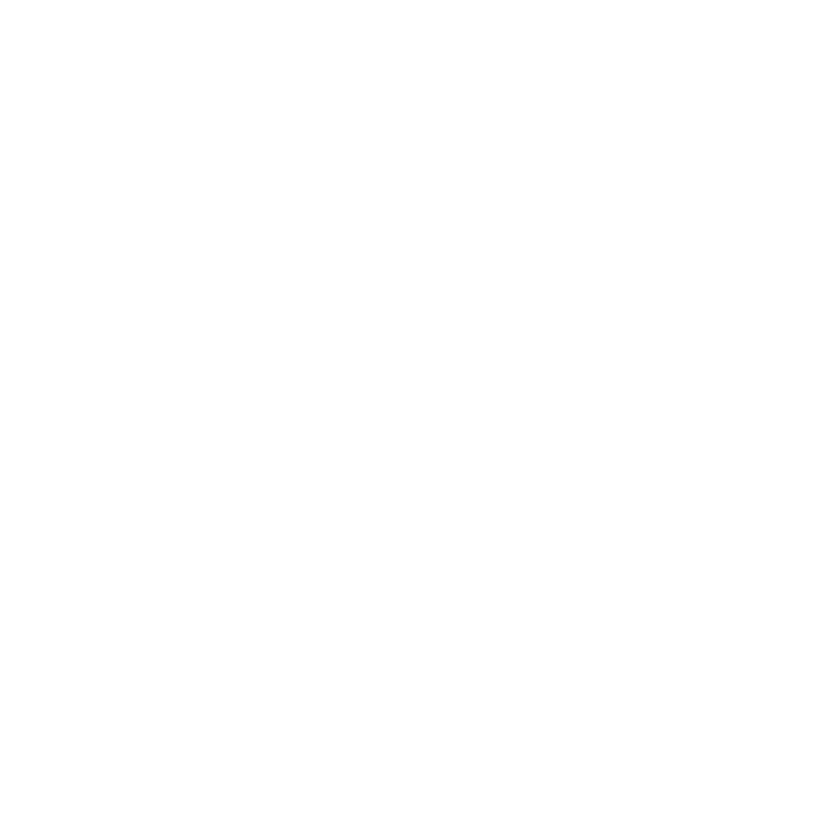

In [69]:
# add residual plot here

ggplot(alligator, aes(ln_snout_length, resid)) + 
  geom_ref_line(h = 0) +
  geom_point() 

In [49]:
# add clf / cross-validation / scoring here

# Multivariate Linear Regression

## Abalone data: predict age of shell from characteristics

<img src="abalone.jpg",width=400,height=200 >

[Image via Wikimedia Commons]

In [59]:
data(abalone)


The downloaded binary packages are in
	/var/folders/y2/1hpzb1qn5j9fkdq211q5q5j00000gn/T//RtmpIsQkAX/downloaded_packages


In [60]:
head(abalone)

Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [61]:
str(abalone)

'data.frame':	4177 obs. of  9 variables:
 $ Type         : Factor w/ 3 levels "F","I","M": 3 3 1 3 2 2 1 1 3 1 ...
 $ LongestShell : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings        : int  15 7 9 10 7 8 20 16 9 19 ...


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


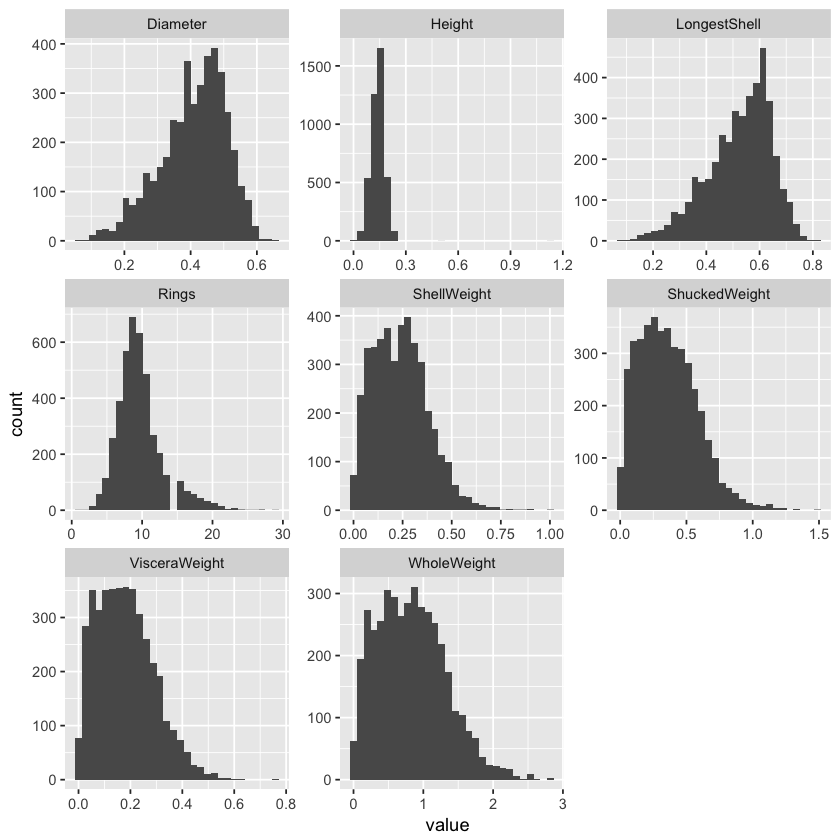

In [72]:
abalone %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

In [ ]:
# train test split remove y etc.

In [74]:
fit_a <- lm(Rings ~ ., abalone)
p <- predict(fit_a, abalone)

In [76]:
error <- p - abalone$Rings
rmse_in <- sqrt(mean(error^2)) ## in-sample RMSE 
rmse_in

[1] 2.191498

In [ ]:
set.seed(42)
ntest <- nrow(diamonds) * 0.80
test <- sample(nrow(diamonds), ntest)
model <- lm(price ~ ., data = diamonds[test, ])
p <- predict(model, diamonds[-test, ])
error <- p - diamonds$price[-test]
rmse_out <- sqrt(mean(error^2)) ## out-of-sample RMSE 
rmse_out


In [ ]:
tr <- sample(nrow(Sonar), round(nrow(Sonar) * 0.6))
train <- Sonar[tr, ]
test <- Sonar[-tr, ]
model <- glm(Class ~ ., data = train, family = "binomial")
p <- predict(model, test, type = "response")
summary(p)

In [ ]:
5.3.2 Cross-validation

Instead of doing a single training/testing split, we can systematise this process, produce multiple, different out-of-sample train/test splits, that will lead to a better estimate of the out-of-sample RMSE.

The figure below illustrates the cross validation procedure, creating 3 folds. One would typically do a 10-fold cross validation (if the size of the data permits it). We split the data into 3 random and complementary folds, so that each data point appears exactly once in each fold. This leads to a total test set size that is identical to the size as the full dataset but is composed of out-of-sample predictions.



In [ ]:
This makes cross-validation quite time consuming, as it takes x+1 (where x in the number of cross-validation folds) times as long as fitting a single model, but is essential.

Note that it is important to maintain the class proportions within the different folds, i.e. respect the proportion of the different classes in the original data. This is also taken care when using the caret package.

The procedure of creating folds and training the models is handled by the train function in caret. Below, we apply it to the diamond price example that we used when introducing the model performance.

We start by setting a random to be able to reproduce the example.
We specify the method (the learning algorithm) we want to use. Here, we use "lm", but, as we will see later, there are many others to choose from1.
We then set the out-of-sample training procedure to 10-fold cross validation (method = "cv" and number = 10). To simplify the output in the material for better readability, we set the verbosity flag to FALSE, but it is useful to set it to TRUE in interactive mode.
set.seed(42)
model <- train(price ~ ., diamonds,
               method = "lm", 
               trControl = trainControl(method = "cv", 
                                        number = 10, 
                                        verboseIter = FALSE))
model

In [ ]:
Once we have trained our model, we can directly use this train object as input to the predict method:

p <- predict(model, diamonds)
error <- p - diamonds$price
rmse_xval <- sqrt(mean(error^2)) ## xval RMSE
rmse_xval
## [1] 1129.843

In [ ]:
5.4.1 Confusion matrix

Instead of calculating an error between predicted value and known value, in classification we will directly compare of the predicted class matches the known label. To do so, rather than calculating the mean accuracy as we did above, in the introductory kNN example, we can calculate a confusion matrix.

A confusion matrix to contrast predictions to actual results. Correct results are true positives (TP) and true negatives that are found along the diagonal. All other cells indicate false results, i.e false negatives (FN) and false positives (FP).

Reference Yes	Reference No
Predicted Yes	TP	FP
Predicted No	FN	TN
The values that populate this table will depend on a the cutoff that we set to define whether the classifier should predict Yes or No. Intuitively, we might want to use 0.5 as a threshold, and assign every result with a probability > 0.5 to Yes and No otherwise.

In [ ]:

To get the statistics on the individual data points, we will use the awesome broom package:
library(broom)
simple_lm_values <- augment(simple_lm)
names(simple_lm_values)